# Zadanie 1: analiza danych sprzedaży

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dane/sales.csv',parse_dates=['order_date'])

In [4]:
df.head(5)

,order_id,product_name,category,price,quantity,order_date
0,1102,Smartphone,Electronics,700.22,2,2023-01-01
1,1435,Speaker,Accessories,1491.96,1,2023-01-02
2,1860,Headphones,Electronics,305.09,2,2023-01-03
3,1270,Charger,Accessories,76.21,1,2023-01-04
4,1106,Mouse,Accessories,766.15,2,2023-01-05


In [6]:
df['revenue'] = df['price']*df['quantity']

In [7]:
#łączny przychód ze sprzedaży dla każdego produktu
product_revenue = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False)

In [9]:
print("pięć najlepiej zarabiających produktów:")
product_revenue.head(5)

pięć najlepiej zarabiających produktów:


product_name
Webcam 29425.50
Mouse 27737.84
Speaker 25987.32
Charger 21029.31
Laptop 20494.80
Name: revenue, dtype: float64

In [11]:
#średnia wartość zamówienie w każdym miesiącu
df['month'] = df['order_date'].dt.to_period('M')
monthly_avg_order_value = df.groupby('month')['revenue'].mean()

In [12]:
print("średnia wartość zamówienia w miesiącu:")
print(monthly_avg_order_value)

średnia wartość zamówienia w miesiącu:
month
2023-01    1765.235161
2023-02    1879.211786
2023-03    1731.776129
2023-04    2698.689000
Freq: M, Name: revenue, dtype: float64


In [13]:
#10 najlepiej sorzedających się kategorii
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False).head(10)

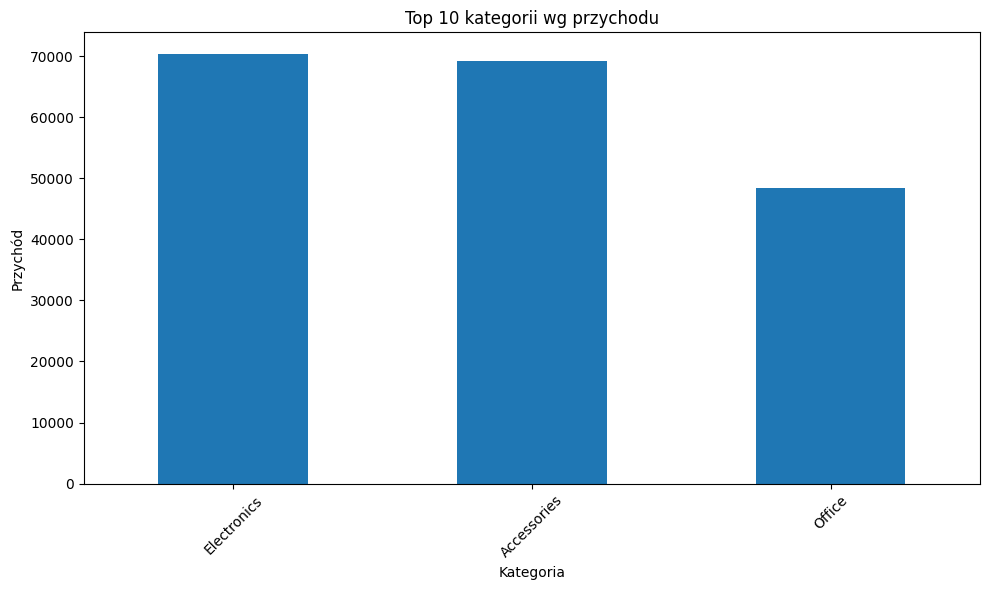

In [14]:
plt.figure(figsize=(10,6))
category_revenue.plot(kind='bar')
plt.title("Top 10 kategorii wg przychodu")
plt.xlabel('Kategoria')
plt.ylabel('Przychód')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()